In [26]:
import pandas as pd


data = pd.read_csv("ckuster_data_alt.csv")
features = data[["shot_quadrant", "pitch_quadrant", "bowler_hand", "bowler_type", "shot type"]]
target = data["runs"]


In [27]:

from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(features_scaled)

# Assign data points to clusters
labels = kmeans.labels_


c:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


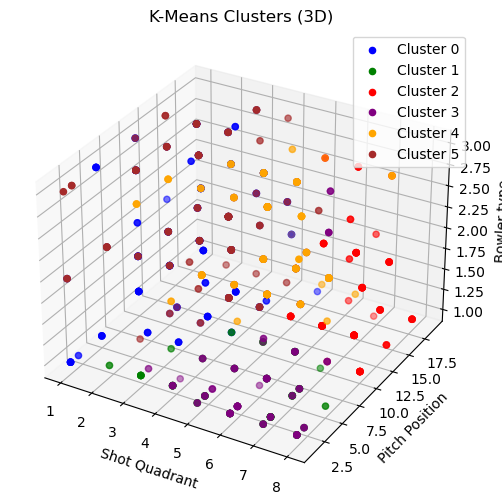

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
features_for_plot = features[['shot_quadrant', 'pitch_quadrant', 'bowler_type']]  # Select 3 features
labels_for_plot = labels
fig = plt.figure(figsize=(8, 6))  # Adjust figure size as needed
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']  # 6 colors for 6 clusters
for i in range(6):
    ax.scatter(features_for_plot[labels_for_plot == i]['shot_quadrant'],
                features_for_plot[labels_for_plot == i]['pitch_quadrant'],
                features_for_plot[labels_for_plot == i]['bowler_type'],
                c=colors[i], label=f'Cluster {i}')

# Customize plot
ax.set_xlabel('Shot Quadrant')
ax.set_ylabel('Pitch Position')
ax.set_zlabel('Bowler type')
ax.set_title('K-Means Clusters (3D)')
ax.legend()  # Show cluster labels
plt.show()

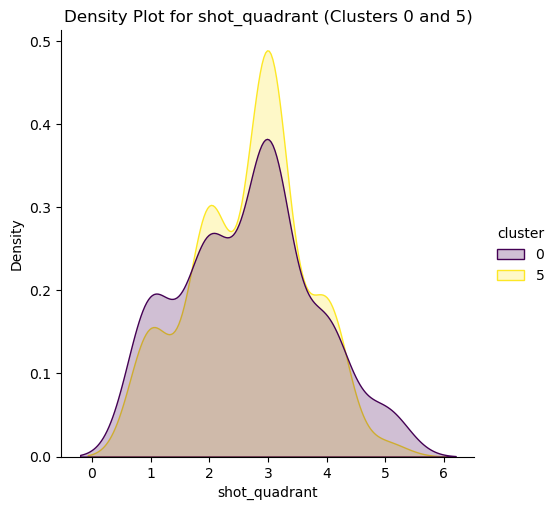

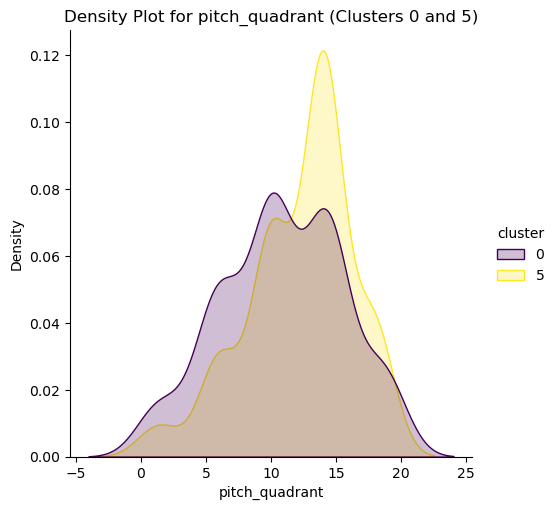

C:\Users\Vedant\AppData\Local\Temp\ipykernel_22404\4245994220.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


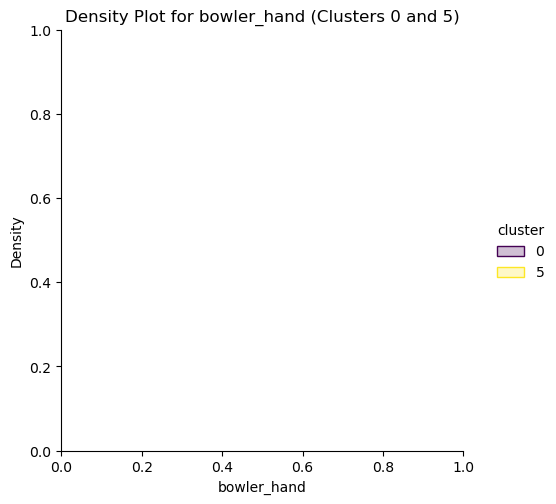

C:\Users\Vedant\AppData\Local\Temp\ipykernel_22404\4245994220.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


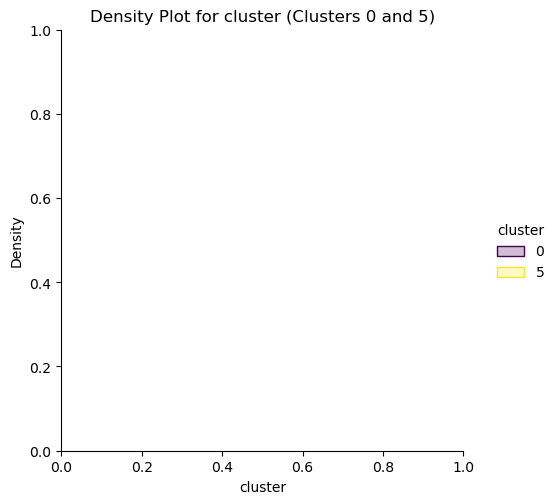

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for plotting
features_for_plot = features[['shot_quadrant', 'pitch_quadrant', 'bowler_hand']]  # Adjust as needed

# Create a DataFrame for easy plotting
df = pd.DataFrame(features_for_plot)
df['cluster'] = labels

# Focus on clusters 0 and 5
df_filtered = df[df['cluster'].isin([0, 5])]

# Create density plots for each feature, highlighting clusters 0 and 5
for feature in features_for_plot.columns:
    sns.displot(
        data=df_filtered, x=feature, hue='cluster', kind='kde',
        fill=True, palette='viridis', common_norm=False
    )
    plt.title(f'Density Plot for {feature} (Clusters 0 and 5)')
    plt.show()

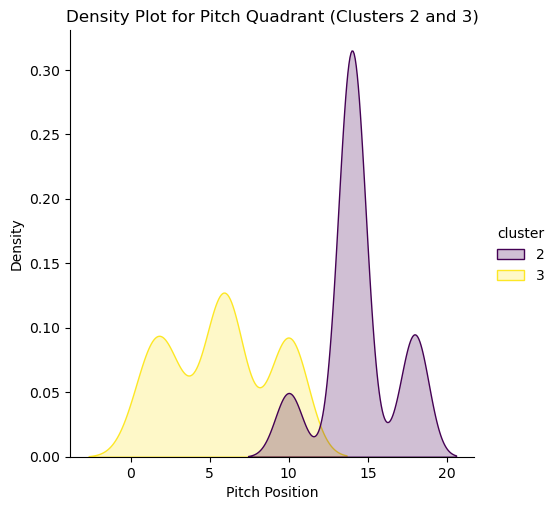

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for clusters 2 and 3
df_filtered = df[df['cluster'].isin([2, 3])]

# Create the density plot
sns.displot(
    data=df_filtered, x='pitch_quadrant', hue='cluster', kind='kde',
    fill=True, palette='viridis', common_norm=False
)
plt.title('Density Plot for Pitch Quadrant (Clusters 2 and 3)')
plt.xlabel('Pitch Position')
plt.show()

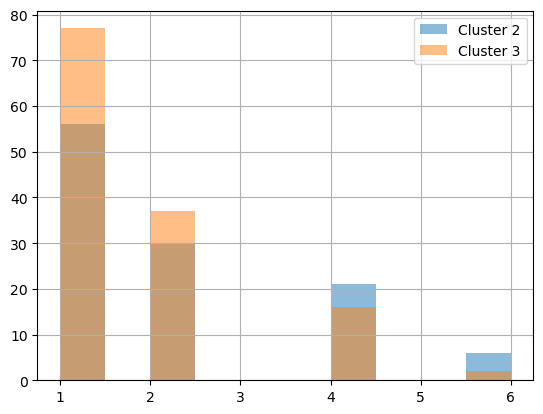

In [32]:
cluster_2_data = data[labels == 2]
cluster_3_data = data[labels == 3]
cluster_2_runs = cluster_2_data["runs"]
cluster_3_runs = cluster_3_data["runs"]
cluster_2_runs.hist(alpha=0.5, label="Cluster 2")
cluster_3_runs.hist(alpha=0.5, label="Cluster 3")
plt.legend()
plt.show()

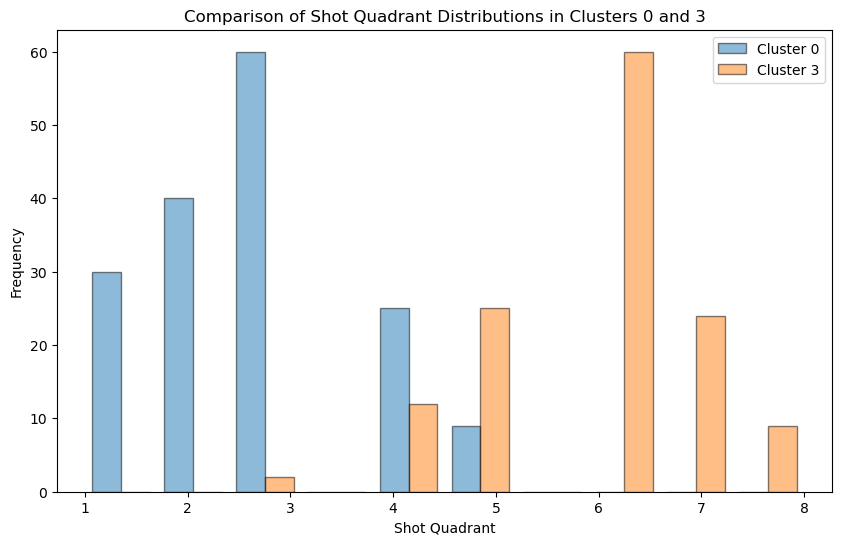

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your previous code)

# Filter data for clusters 0 and 3
cluster_0_data = data[labels == 0]
cluster_3_data = data[labels == 3]

# Extract shot quadrants
cluster_0_quadrants = cluster_0_data["shot_quadrant"]
cluster_3_quadrants = cluster_3_data["shot_quadrant"]

# Create the combined histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.hist([cluster_0_quadrants, cluster_3_quadrants], 
         bins=10,  # Adjust bin count if desired
         label=["Cluster 0", "Cluster 3"], 
         alpha=0.5,  # Adjust transparency for better visual comparison
         edgecolor="black")  # Add edge lines for clarity

plt.xlabel("Shot Quadrant")
plt.ylabel("Frequency")
plt.title("Comparison of Shot Quadrant Distributions in Clusters 0 and 3")
plt.legend()
plt.show()

count    164.000000
mean       2.262195
std        1.530319
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        6.000000
Name: runs, dtype: float64
count    132.000000
mean       1.719697
std        1.114200
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: runs, dtype: float64


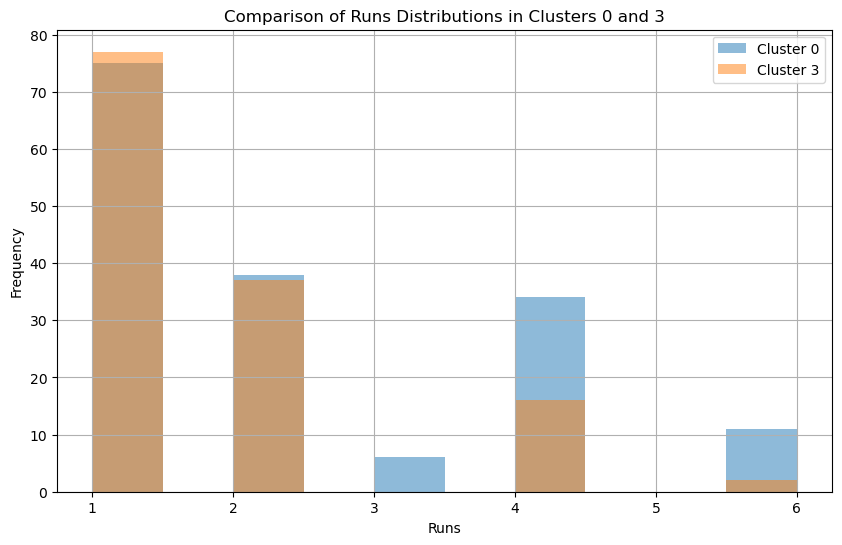

In [34]:
cluster_0_data = data[labels == 0]
cluster_3_data = data[labels == 3]
cluster_0_runs = cluster_0_data["runs"]
cluster_3_runs = cluster_3_data["runs"]
print(cluster_0_runs.describe())
print(cluster_3_runs.describe())
plt.figure(figsize=(10, 6))
cluster_0_runs.hist(alpha=0.5, label="Cluster 0")
cluster_3_runs.hist(alpha=0.5, label="Cluster 3")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.title("Comparison of Runs Distributions in Clusters 0 and 3")
plt.legend()
plt.show()

C:\Users\Vedant\AppData\Local\Temp\ipykernel_22404\3820331570.py:8: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density_0 = kde.gaussian_kde(cluster_0_pitch_quadrants)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_22404\3820331570.py:9: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density_3 = kde.gaussian_kde(cluster_3_pitch_quadrants)


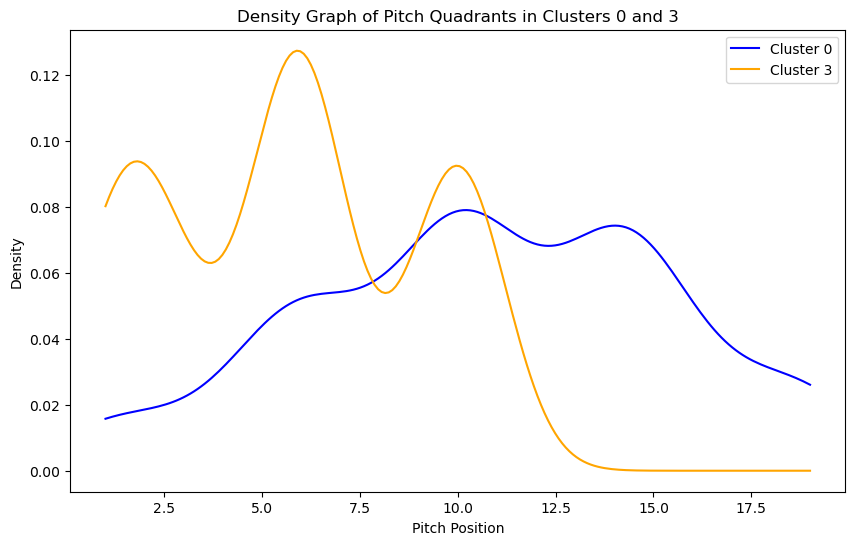

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde
cluster_0_data = data[labels == 0]
cluster_3_data = data[labels == 3]
cluster_0_pitch_quadrants = cluster_0_data["pitch_quadrant"]
cluster_3_pitch_quadrants = cluster_3_data["pitch_quadrant"]
density_0 = kde.gaussian_kde(cluster_0_pitch_quadrants)
density_3 = kde.gaussian_kde(cluster_3_pitch_quadrants)
x_min = min(cluster_0_pitch_quadrants.min(), cluster_3_pitch_quadrants.min())
x_max = max(cluster_0_pitch_quadrants.max(), cluster_3_pitch_quadrants.max())
x = np.linspace(x_min, x_max, 200)
density_0_values = density_0(x)
density_3_values = density_3(x)
plt.figure(figsize=(10, 6))

plt.plot(x, density_0_values, label="Cluster 0", color="blue")
plt.plot(x, density_3_values, label="Cluster 3", color="orange")

plt.xlabel("Pitch Position")
plt.ylabel("Density")
plt.title("Density Graph of Pitch Quadrants in Clusters 0 and 3")
plt.legend()
plt.show()


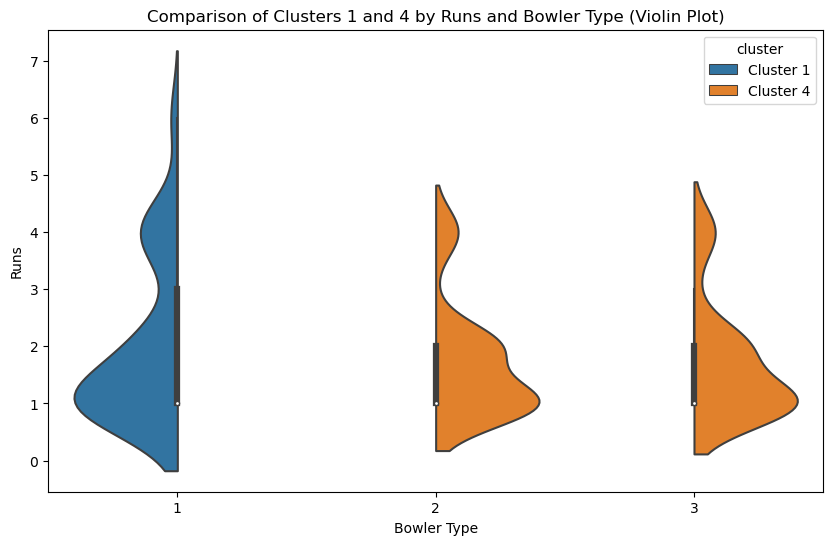

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for clusters 1 and 4
cluster_1_data = data[labels == 1]
cluster_4_data = data[labels == 4]

# Create a combined DataFrame for easier plotting
combined_data = pd.concat([
    cluster_1_data[["bowler_type", "runs"]].assign(cluster="Cluster 1"),
    cluster_4_data[["bowler_type", "runs"]].assign(cluster="Cluster 4")
])

# Create a violin plot with runs on the y-axis, bowler type on the x-axis, and clusters distinguished by color
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
sns.violinplot(
    x="bowler_type",
    y="runs",
    hue="cluster",
    split=True,  # Separate violins for each cluster
    data=combined_data
)

plt.title("Comparison of Clusters 1 and 4 by Runs and Bowler Type (Violin Plot)")
plt.xlabel("Bowler Type")
plt.ylabel("Runs")
plt.show()


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two features for visualization, for example, "shot_quadrant" and "pitch_quadrant"
feature1 = "shot_quadrant"
feature2 = "pitch_quadrant"

# Scatter plot with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue="cluster", data=data, palette="viridis", s=100)
plt.title(f'KMeans Clustering of Cricket Shots - {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Cluster')

plt.show()


ValueError: Could not interpret value `cluster` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

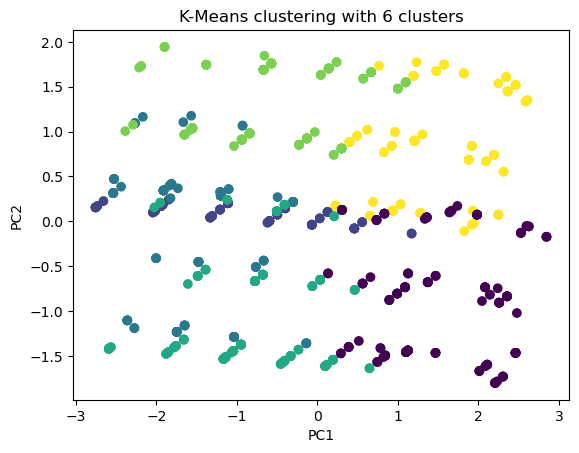

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Calculate the silhouette score to assess cluster quality
silhouette_score(features_scaled, labels)

# Visualize the clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means clustering with 6 clusters")
plt.show()


In [ ]:
import pandas as pd

# Add the cluster labels as a new column to the DataFrame
data["cluster"] = labels
print(data)

# Alternatively, you can print only specific columns:
print(data[["shot_quadrant", "pitch_quadrant", "bowler_hand", "bowler_type", "shot type", "runs", "cluster"]])

     shot_quadrant  pitch_quadrant  bowler_hand  bowler_type  shot type  runs  \
0                1              17            1            1          2     4   
1                1              17            1            1          2     4   
2                1              17            1            1          2     2   
3                1              17            1            1          2     2   
4                1              19            0            1          2     2   
..             ...             ...          ...          ...        ...   ...   
752              8               5            0            3         14     4   
753              8               1            1            3         14     4   
754              8               2            1            3         14     1   
755              8               2            1            3         14     1   
756              8               2            0            3         14     1   

         Unnamed: 6  cluste

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
print(data)  

     shot_quadrant  pitch_quadrant  bowler_hand  bowler_type  shot type  runs  \
0                1              17            1            1          2     4   
1                1              17            1            1          2     4   
2                1              17            1            1          2     2   
3                1              17            1            1          2     2   
4                1              19            0            1          2     2   
5                1              19            0            1          2     6   
6                1              19            0            1          2     6   
7                1               1            0            1          1     4   
8                1               1            0            1          1     4   
9                1               1            0            1          1     4   
10               1               5            0            1          1     4   
11               1          

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame with the added "cluster" column
data["cluster"] = labels

# Specify the path where you want to save the CSV file with double backslashes
csv_path = "C:\\Users\\Vedant\\Desktop\\Project 5\\Research\\file.csv"

# Save the entire DataFrame to a CSV file
data.to_csv(csv_path, index=False)

# Alternatively, if you only want to save specific columns
selected_columns = ["shot_quadrant", "pitch_quadrant", "bowler_hand", "bowler_type", "shot type", "runs", "cluster"]
data[selected_columns].to_csv(csv_path, index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import plotly.express as px

# Generating random data for illustration
np.random.seed(42)
data = pd.DataFrame({
    "shot_quadrant": np.random.rand(100),
    "pitch_quadrant": np.random.rand(100),
    "bowler_hand": np.random.choice(["left", "right"], size=100),
    "bowler_type": np.random.choice(["fast", "spin"], size=100),
    "shot type": np.random.choice(["drive", "pull", "cut"], size=100),
    "runs": np.random.randint(0, 10, size=100)
})

# Selecting features and target
features = data[["shot_quadrant", "pitch_quadrant", "bowler_hand", "bowler_type", "shot type"]]
target = data["runs"]

# Creating transformers for numerical and categorical columns
numerical_features = features.select_dtypes(include=['float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and clustering steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('kmeans', KMeans(n_clusters=6, random_state=42))])

# Fit and transform the pipeline
data['cluster'] = pipeline.fit_predict(features)

# Parallel Coordinate Plot
fig = px.parallel_coordinates(data, color="cluster", color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


c:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Vedant\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [
